<a href="https://colab.research.google.com/github/Rosari03/Metodos-Numericos/blob/main/Metodo_Hermite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hermite


Los polinomios de Hermite son una familia de polinomios especiales que se utilizan mucho en matemáticas y física, especialmente en probabilidades y en la mecánica cuántica.

Son como una "herramienta" que nos ayuda a resolver ciertos problemas, como la forma de una onda o cómo se distribuyen algunas variables aleatorias.

In [ ]:
import sympy as sp
from sympy import sympify, lambdify
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:

def hermite(x, y, z):
    n = len(x)
    m = 2 * n
    Q = [[0.0 for _ in range(m)] for _ in range(m)]
    X = [0.0 for _ in range(m)]

    # Duplicar nodos
    for i in range(n):
        X[2*i] = X[2*i+1] = x[i]
        Q[2*i][0] = Q[2*i+1][0] = y[i]
        Q[2*i+1][1] = z[i]
        if i != 0:
            Q[2*i][1] = (Q[2*i][0] - Q[2*i-1][0]) / (X[2*i] - X[2*i-1])

    for i in range(2, m):
        for j in range(2, i+1):
            Q[i][j] = (Q[i][j-1] - Q[i-1][j-1]) / (X[i] - X[i-j])

    return Q, X

def construir_polinomio(Q, X):
    x = sp.Symbol('x')
    n = len(X)
    polinomio = Q[0][0]
    producto = 1

    for i in range(1, n):
        producto *= (x - X[i-1])
        polinomio += Q[i][i] * producto

    return sp.expand(polinomio)



Polinomio de Hermite:
-0.00277469135798944*x**5 + 0.0240317901231809*x**4 - 0.0145560802460553*x**3 - 0.235216169754413*x**2 - 0.00822922345577151*x + 1.00194406469105


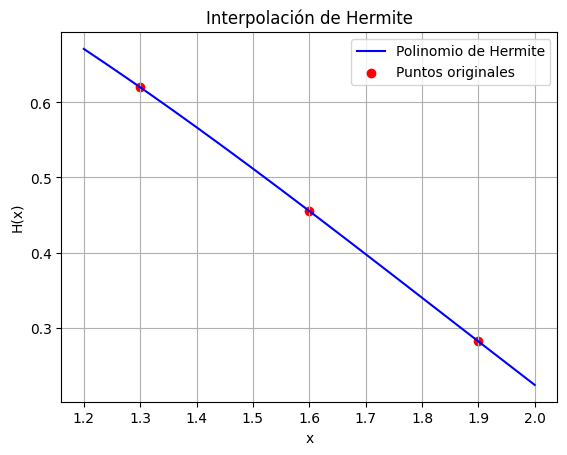

In [ ]:
# Datos
X_pts = [1.3, 1.6, 1.9]
Y = [0.6200860, 0.4554022, 0.2818186]
Z = [-0.5220232, -0.5698959, -0.5811571]

# Construir tabla y polinomio
tabla, X_dupl = hermite(X_pts, Y, Z)
polinomio = construir_polinomio(tabla, X_dupl)

print("Polinomio de Hermite:")
print(polinomio)
# Evaluación para graficar
f = sp.lambdify(sp.Symbol('x'), polinomio, modules='numpy')
x_vals = np.linspace(min(X_pts)-0.1, max(X_pts)+0.1, 2000)
y_vals = f(x_vals)

# Graficar
plt.plot(x_vals, y_vals, label="Polinomio de Hermite", color='blue')
plt.scatter(X_pts, Y, color='red', label='Puntos originales')
plt.title("Interpolación de Hermite")
plt.xlabel("x")
plt.ylabel("H(x)")
plt.legend()
plt.grid(True)
plt.show()